# Final Project
# "Classifying The Brain on Music"

Michael Casey, https://www.frontiersin.org/journals/psychology/articles/10.3389/fpsyg.2017.01179/full



#### Your objective is to classify fMRI brain images taken while listening to music in five different genres: label 0=Ambient Music, 1=Country Music, 2=Heavy Metal, 3=Rock 'n Roll, 4=Classical Symphonic. The data consists of train_data.csv,  train_labels.csv, and test_data.csv, for a one-person subset of a larger 20-subject study, linked above.

#### The training data (train_data.csv) consist of 160 event-related brain images (trials), corresponding to twenty 6-second music clips, four clips in each of the five genres, repeated in-order eight times (runs). The labels (train_labels.csv) correspond to the correct musical genres, listed above, for each of the 160 trials.

#### There are 22036 features in each brain image, corresponding to blood-oxygenation levels at each 2mm-cubed 3D location within a section of the auditory cortex. In human brain imaging, there are often many more features (brain sites) than samples (trials), thus making the task a relatively challenging multiway classification problem.

#### The testing data (test_data.csv) consists of 40 event-related brain images corresponding to novel 6-second music clips in the five genres. The test data is in randomized order with no labels. You must predict, using only the given brain images, the correct genre labels (0-4) for the 40 test trials.

## **1. Multi-Class Genre Classifier** [[12 points]](https://)

#### Build a multi-class classifier for the 5 music genres. Your goal is to train a model to classify brain images into corresponding genre categories. You are free to choose any machine learning models from the class.

#### **1-1. Hyper-parameter Search.** [[4 points]](https://) Demonstrate your hyperparameter search process using cross-validation. Provide details for at least one hyperparameter with 10 different possible values.

#### **1-2. Model Training and Testing.** [[4 points]](https://) Following the hyperparameter search, train your model with the best combination of hyperparameters. Run the model on the test set and submit the results to the Kaggle competition. To get full marks, your model should outperform the baseline model, which is provided in Kaggle. You **must** show your test accuracy computed by Kaggle in this report.   

#### **1-3. Model Analysis.** [[4 points]](https://) Conduct a thorough analysis of your model, including:

#### **1-3-1. Confusion Matrix:** Split the training set into train/validation sets. The data is organized into eight runs, in order, with each run repeating the same 20 music trials. You should split the data by run. Retrain your model using the best hyperparameter combination. Present the confusion matrix on the validation set.

#### **1-3-2. Example Examination:** Examine four validation samples where your model fails to classify into the correct category. Display the true label and the predicted label. Looking at the confusion matrix, how might you explain your results from the perspectives of human brain data and music genre similarity?



---

## **A. Data Download**
#### For your convenience, we have provided code to download the dataset, which includes true labels, training data (features), training labels, and testing data (features).

#### **A-1. Download Features and Labels.**
#### Run the following code to download the brain features and labels of the music clips.


In [ ]:
import numpy as np
# !pip install gdown
!pip install --upgrade --no-cache-dir gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [ ]:
!gdown --id 1aFDPryEDcT5wg0k8NhWYpF8lulGmot5J # train data
!gdown --id 11kgAdB_hkEcC4npCEWJcAOOmGe3495yY # train labels
!gdown --id 1wXq56F6RIUtDzPceZegZAMA-JGW21Gqu # test data

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1aFDPryEDcT5wg0k8NhWYpF8lulGmot5J
To: /content/train_data.csv
100% 89.7M/89.7M [00:04<00:00, 22.1MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=11kgAdB_hkEcC4npCEWJcAOOmGe3495yY
To: /content/train_labels.csv
100% 320/320 [00:00<00:00, 893kB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://d

In [ ]:
# Data Import Method 1, with pandas
import pandas as pd
train_data = pd.read_csv("train_data.csv", header=None)
train_labels = pd.read_csv("train_labels.csv", header=None)
test_data = pd.read_csv("test_data.csv", header=None)

print('train_data.shape: {}'.format(train_data.shape))
print('train_labels.shape: {}'.format(train_labels.shape))
print('test_data.shape: {}'.format(test_data.shape))

train_data.shape: (160, 22036)
train_labels.shape: (160, 1)
test_data.shape: (40, 22036)


In [ ]:
# Data Import Method 2 (alternative, no pandas): Read the data into memory using python's built-in CSV parser

import csv

with open('train_data.csv', 'r') as csvfile:
  train_data = np.array([row for row in csv.reader(csvfile, delimiter=',', quoting=csv.QUOTE_NONNUMERIC)])
with open('train_labels.csv', 'r') as csvfile:
  train_labels = np.array( [row for row in csv.reader(csvfile, delimiter=',', quoting=csv.QUOTE_NONNUMERIC)] )
with open('test_data.csv', 'r') as csvfile:
  test_data = np.array( [row for row in csv.reader(csvfile, delimiter=',', quoting=csv.QUOTE_NONNUMERIC)] )

print('Shape of train_data: {0}'.format(train_data.shape))
print('Shape of train_labels: {0}'.format(len(train_labels)))
print('Shape of test_data: {0}'.format(test_data.shape))

Shape of train_data: (160, 22036)
Shape of train_labels: 160
Shape of test_data: (40, 22036)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# PCA performed on both train and test data in order to reduce dimensionality of data
pca = PCA(n_components = .9)
train_data_pca = pca.fit_transform(train_data)
test_data_pca = pca.transform(test_data)

# Define the grid search model
# SVC selected as model due to high dimensionality of data
# Kernel function of 'linear' and gamma setting of 'auto' were determined as optimal through CV testing
# Kernel functions tested: Linear, Poly (degs: 1, 2, 3, 4, 5), RBF, Sigmoid
# Gamma settings tested: Auto, Scale, 0.01, 0.1, 1
grid_search_model = SVC(kernel = 'linear', gamma = 'auto')

# Define the parameter grid for cross validation testing of C (regularization parameter)
# Using grid search, we can run various fits for a range of 10 values of C to determine
# which value results in the optimal performance of model given training dataset and other params (kernel function, gamma, etc.)
param_grid = {
  'C': [0.00001, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
}

# Setup and perform the grid search
grid_search = GridSearchCV(grid_search_model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(train_data_pca, train_labels)

# Retrieves best parameters and best score achieved through grid search across model
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Saves the optimal model into new variable and refits to training data
model = grid_search.best_estimator_
model.fit(train_data_pca, train_labels)

# Uses optimal model to predict labels for test data
test_labels = model.predict(test_data_pca)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'C': 0.0001}
Best score: 0.76875


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Formats and saves test labels as csv for Kaggle competition
kaggle = pd.DataFrame({'id': range(0, 40), 'predicted': test_labels})
kaggle.to_csv('test_labels.csv', index = False)

# Test accuracy on Kaggle of 0.8

In [ ]:
from sklearn.model_selection import train_test_split

# Splits training data into train and validation sets
# Purposefully disabled shuffle in order to maintain order of runs
# Using test size of 0.25, runs 1-6 are allocated for training and runs 7-8 are allocated for validation
X_train, X_val, y_train, y_val = train_test_split(train_data_pca, train_labels, test_size = 0.25, shuffle = False)

In [ ]:
# Generates new model based on parameters determined as optimal through CV testing above
# and fits model to training data
optimized_model = SVC(kernel = 'linear', gamma = 'auto', C = 0.0001)
optimized_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.0001, gamma='auto', kernel='linear')

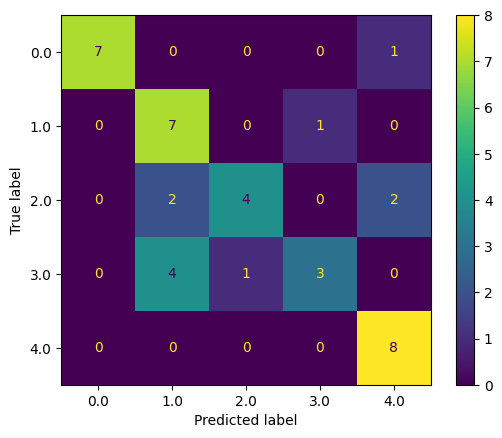

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predicts validation labels using validation set
y_pred = optimized_model.predict(X_val)

# Generate confusion matrix between true and predicted labels
# Confustion matrix display code retrieved from class activity
cm = confusion_matrix(y_val, y_pred, labels=optimized_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = optimized_model.classes_)
disp.plot()
plt.show()

In [ ]:
import random

# Parses throguh predicted and true labels and identified which predictions were incorrect
# Saves indices of incorrect predictions
incorrect_preds = []
for i in range(len(y_pred)):
  if y_pred[i] != y_val[i]:
    incorrect_preds.append(i)

labels = ['Ambient Music', 'Country Music', 'Heavy Metal', 'Rock \'n Roll', 'Classical Symphonic']

# Prints true and predicted labels of random collection of incorrect predictions
random.shuffle(incorrect_preds)
for i in range(0, 4):
    print(f"Sample {incorrect_preds[i]}: True label = {labels[int(y_val[incorrect_preds[i]])]}, Predicted label = {labels[int(y_pred[incorrect_preds[i]])]}")

Sample 31: True label = Heavy Metal, Predicted label = Classical Symphonic
Sample 14: True label = Rock 'n Roll, Predicted label = Heavy Metal
Sample 30: True label = Heavy Metal, Predicted label = Classical Symphonic
Sample 34: True label = Rock 'n Roll, Predicted label = Country Music


<ipython-input-18-97716daa619b>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Sample {incorrect_preds[i]}: True label = {labels[int(y_val[incorrect_preds[i]])]}, Predicted label = {labels[int(y_pred[incorrect_preds[i]])]}")


Looking at the confusion matrix as well as the random selected incorrect predictions, we can begin to see some trends. In particular, the three most common incorrect predictions (Rock 'n Roll predicted as Country Music, Heavy Metal predicted as Country Music, and Heavy Metal predicted as Classical Symphonic) implicate that this arrangement of genres have very similar impacts upon brain behavior and imaging. Additionally, looking at the true labels with the most incorrect predictions, specifically Heavy Metal and Rock 'n Roll, suggest how similar they are in musical composition, which is verifiable based upon when you listen. Both are very rhythmic forms of music with strong percussion and string accompaniments, which helps to explain why they were commonly confused with each other and the related forms of music.